# **Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.


The dataset that I'll be using in this project contains 15,000 rows and 10 columns for the variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [110]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset



In [111]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("./HR_comma_sep.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [112]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [113]:
# Gather descriptive statistics about the data
df0.describe(include='all')

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

### Rename columns

In [114]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [115]:
# Rename columns as needed
df0 = df0.rename(columns={'Department': 'department_name', 'left': 'left_company'})
# Display all column names after the update
### YOUR CODE HERE ###
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left_company  promotion_last_5years  \
0                   3              0             1                      0   
1                   6              0             1                      0   
2                   4              0             1                      0   
3                   5              0             1                      0   
4                   3              0             1                      0   
5                   3              0             1                      0   
6                   4              0             1                      0   
7                   5              0             1                      0   
8                   5              0             1                      0   
9                   3              0             1                      0   

  department_name  salary  
0           sales     low  
1           sales  medium  
2           sales  medium  
3           sales     low  
4           sales     low  
5           sales     low  
6           sales     low  
7           sales     low  
8           sales     low  
9           sales     low

### Check missing values

Check for any missing values in the data.

In [116]:
# Check for missing values
df0.isna().sum()

df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left_company             0
promotion_last_5years    0
department_name          0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [117]:
# Check for duplicates
### YOUR CODE HERE ###
duplicate_rows = df0[df0.duplicated()] 
duplicate_rows

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left_company  \
396                     139                   3              0             1   
866                     128                   3              0             1   
1317                    127                   3              0             1   
1368                    132                   3              0             1   
1461                    142                   3              0             1   
...                     ...                 ...            ...           ...   
14994                   151                   3              0             1   
14995                   160                   3              0             1   
14996                   143                   3              0             1   
14997                   280                   4              0             1   
14998                   158                   3              0             1   

       promotion_last_5years department_name  salary  
396                        0           sales     low  
866                        0      accounting     low  
1317                       0           sales  medium  
1368                       0           RandD     low  
1461                       0           sales     low  
...                      ...             ...     ...  
14994                      0         support     low  
14995                      0         support     low  
14996                      0         support     low  
14997                      0         support     low  
14998                      0         support     low  

[3008 rows x 10 columns]

In [118]:
# Inspect some rows containing duplicates as needed


In [119]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


df1.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left_company  promotion_last_5years  \
0                   3              0             1                      0   
1                   6              0             1                      0   
2                   4              0             1                      0   
3                   5              0             1                      0   
4                   3              0             1                      0   
5                   3              0             1                      0   
6                   4              0             1                      0   
7                   5              0             1                      0   
8                   5              0             1                      0   
9                   3              0             1                      0   

  department_name  salary  
0           sales     low  
1           sales  medium  
2           sales  medium  
3           sales     low  
4           sales     low  
5           sales     low  
6           sales     low  
7           sales     low  
8           sales     low  
9           sales     low

### Check outliers

Check for outliers in the data.

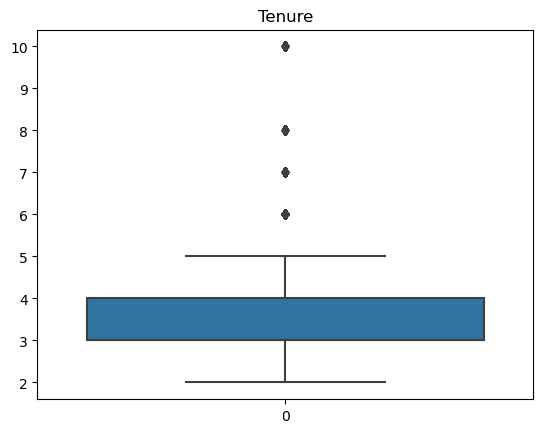

In [120]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df1['time_spend_company'])
plt.title('Tenure')
plt.show()

# People tend to spend an average of 3.5 years

In [121]:
# Determine the number of rows containing outliers

# 25th percentile value
percent25 = df1['time_spend_company'].quantile(0.25)

# 75 percentile value
percent75 = df1['time_spend_company'].quantile(0.75)

# interquartile range
iqr = percent75 - percent25

# Define the upper limit and lower limit for non-outlier values
upper_lim = percent75 + 1.5 * iqr
lower_lim = percent25 - 1.5 * iqr
print("Upper limit:", upper_lim)
print("Lower limit:", lower_lim)

# Identify subset of data containing outliers
outliers = df1[(df1['time_spend_company'] > upper_lim) | (df1['time_spend_company'] < lower_lim)]

# Count how many rows in the data contain outliers
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Upper limit: 5.5
Lower limit: 1.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [122]:
# Get numbers of people who left vs. stayed
left = df1['left_company'].sum()
stayed = len(df1) - left
print(left) 
print(stayed)
# Get percentages of people who left vs. stayed
print(df1['left_company'].value_counts(normalize=True))

1991
10000
0    0.833959
1    0.166041
Name: left_company, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

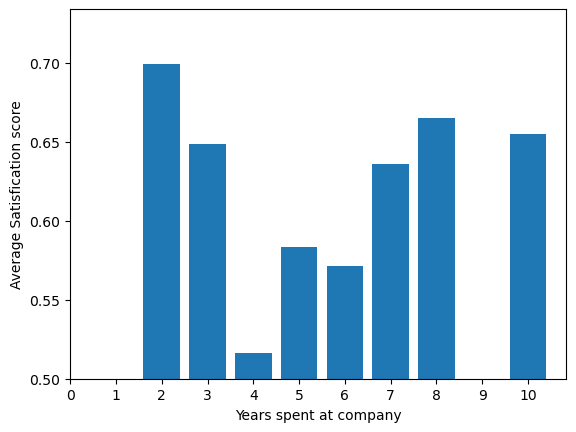

In [123]:
# Create a plot as needed

avg_sat = df1.groupby('time_spend_company')['satisfaction_level'].mean()
years = range(0,11)
plt.bar(avg_sat.index, avg_sat.values)
plt.xticks(years)
plt.ylim(ymin=.5)
plt.ylabel('Average Satisfication score')
plt.xlabel('Years spent at company')
plt.show()

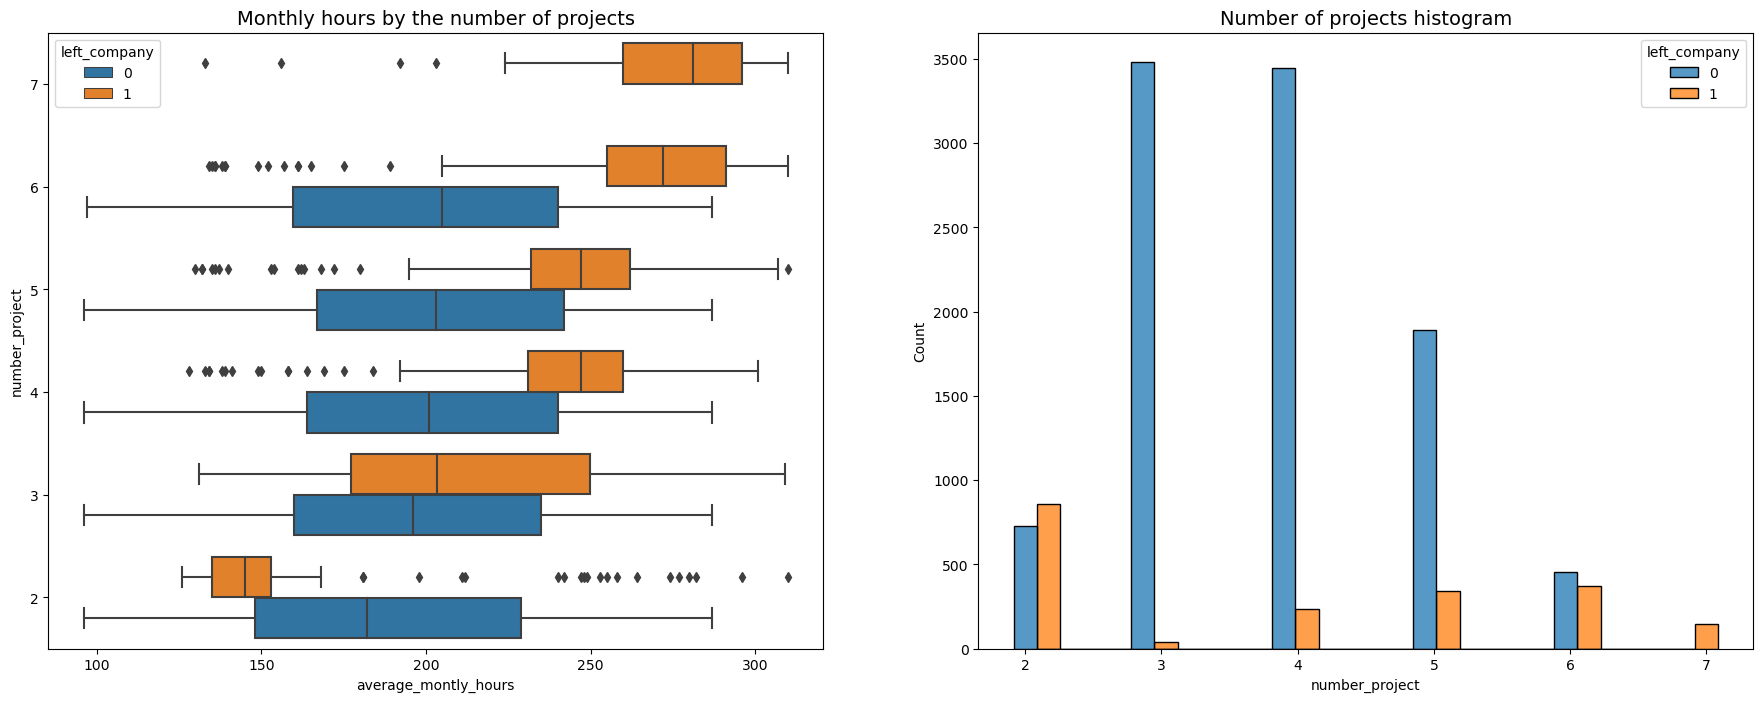

In [124]:
# Create a plot 
# set figure axes
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Create boxplot showing average_monthly_hours distribution for number_projects, comparing employees who stayed vs those who left
sns.boxplot(data=df1, x='average_montly_hours', y='number_project', hue='left_company', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by the number of projects', fontsize='14')

# Create histogram showing the distribution of 'number_project', comparing employees who stayed versus who left
tenure_stay = df1[df1['left_company']==0]['number_project']
tenure_left = df1[df1['left_company']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left_company', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

In [125]:
# Checking to see if those that completed 7 projects all quit
df1[df1['number_project']==7]['left_company'].value_counts()

1    145
Name: left_company, dtype: int64

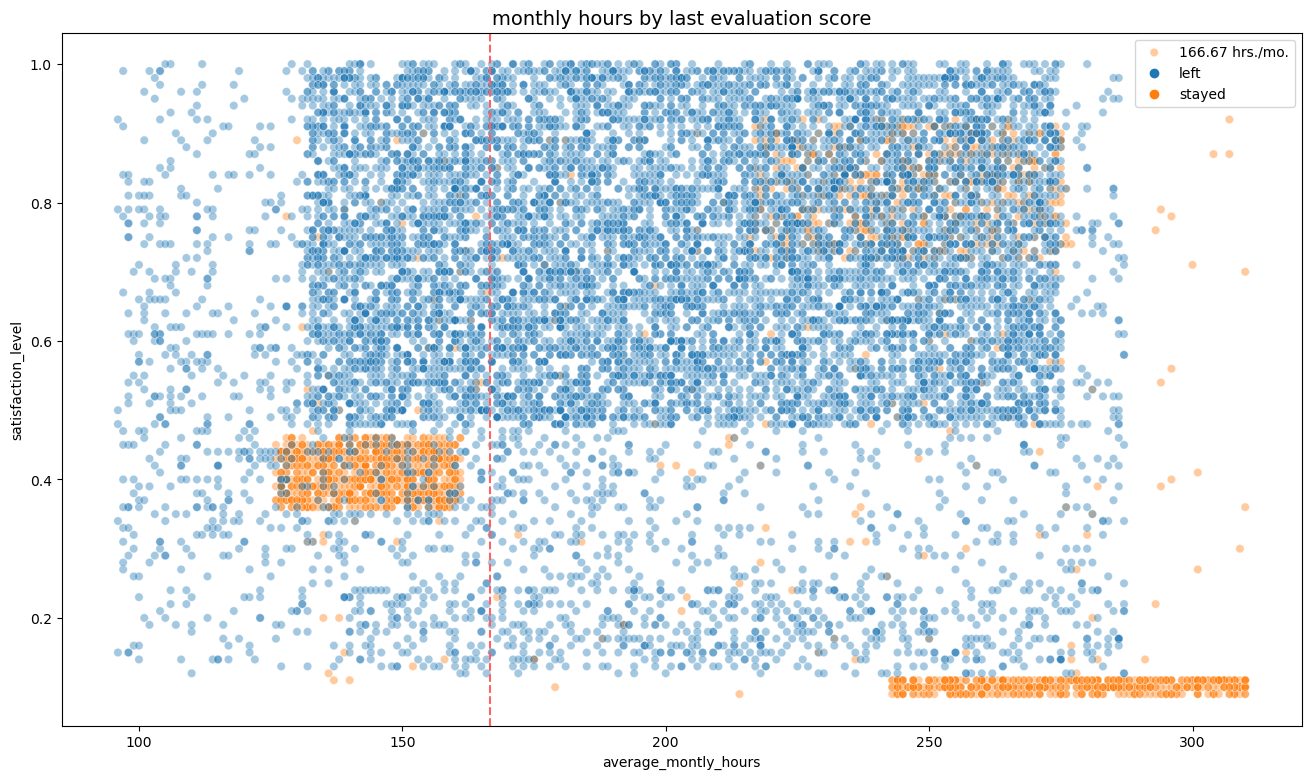

In [218]:
# Create scatterplot of 'average_monthly_users' vs 'satisfaction_level', comparing employees who stayed to those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_montly_hours', y='satisfaction_level', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('monthly hours by last evaluation score', fontsize='14');
plt.savefig("my_hr_scatterplot.png")

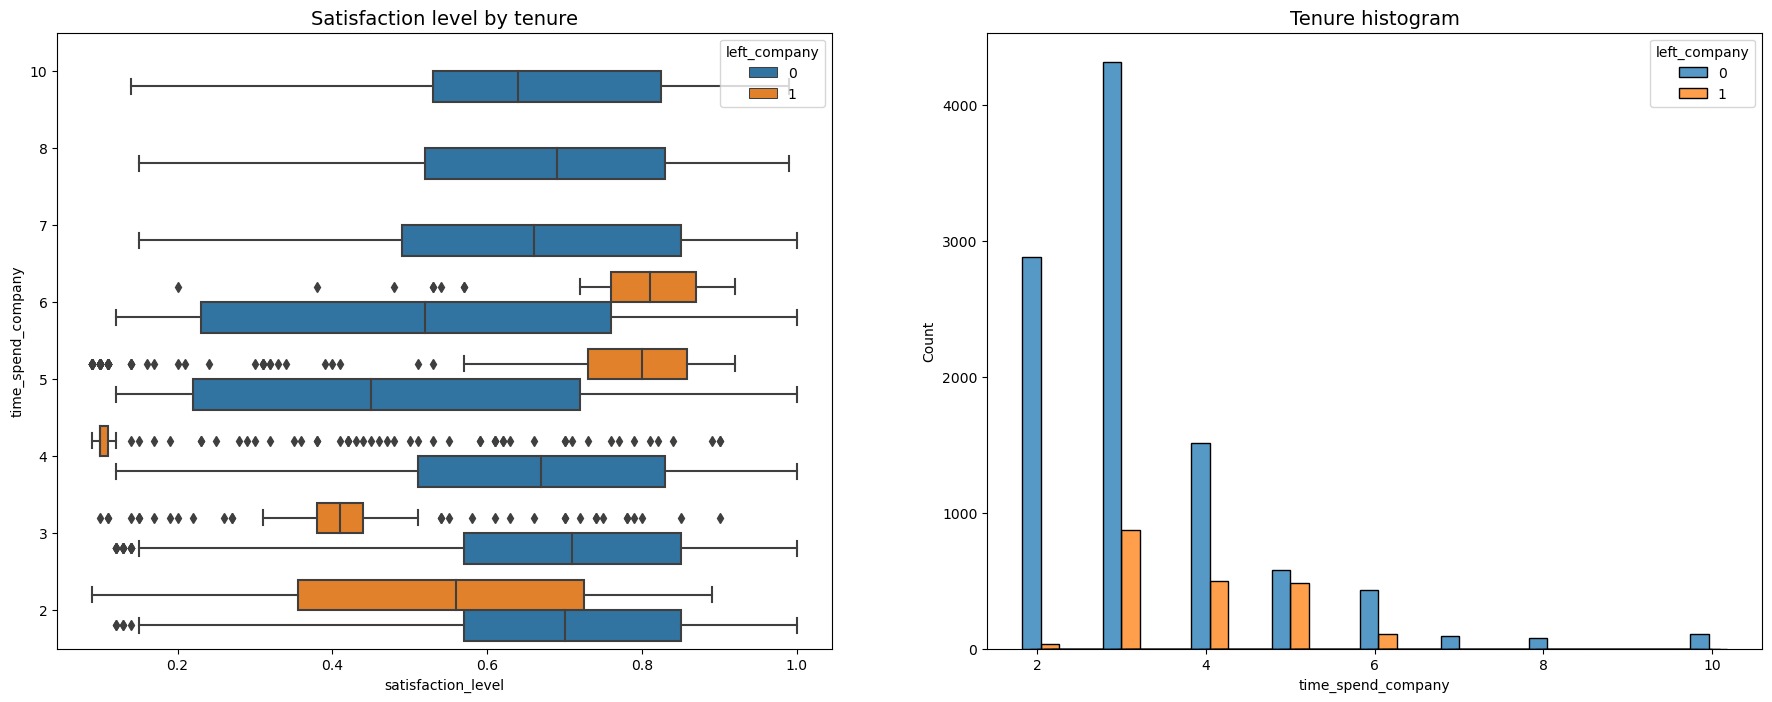

In [127]:
# Create a plot for satisfaction vs tenure
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

sns.boxplot(data=df1, x='satisfaction_level', y='time_spend_company', hue='left_company', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level by tenure', fontsize='14')

tenure_stay = df1[df1['left_company']==0]['time_spend_company']
tenure_left = df1[df1['left_company']==1]['time_spend_company']
sns.histplot(data=df1, x='time_spend_company', hue='left_company', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

In [128]:
# calculate mean and median satisfaction scores of employees who left and those stayed
df1.groupby(['left_company'])['satisfaction_level'].agg([np.mean,np.median])

mean  median
left_company                  
0             0.667365    0.69
1             0.440271    0.41

Text(0.5, 1.0, 'Salary histogram by tenure: long tenured people')

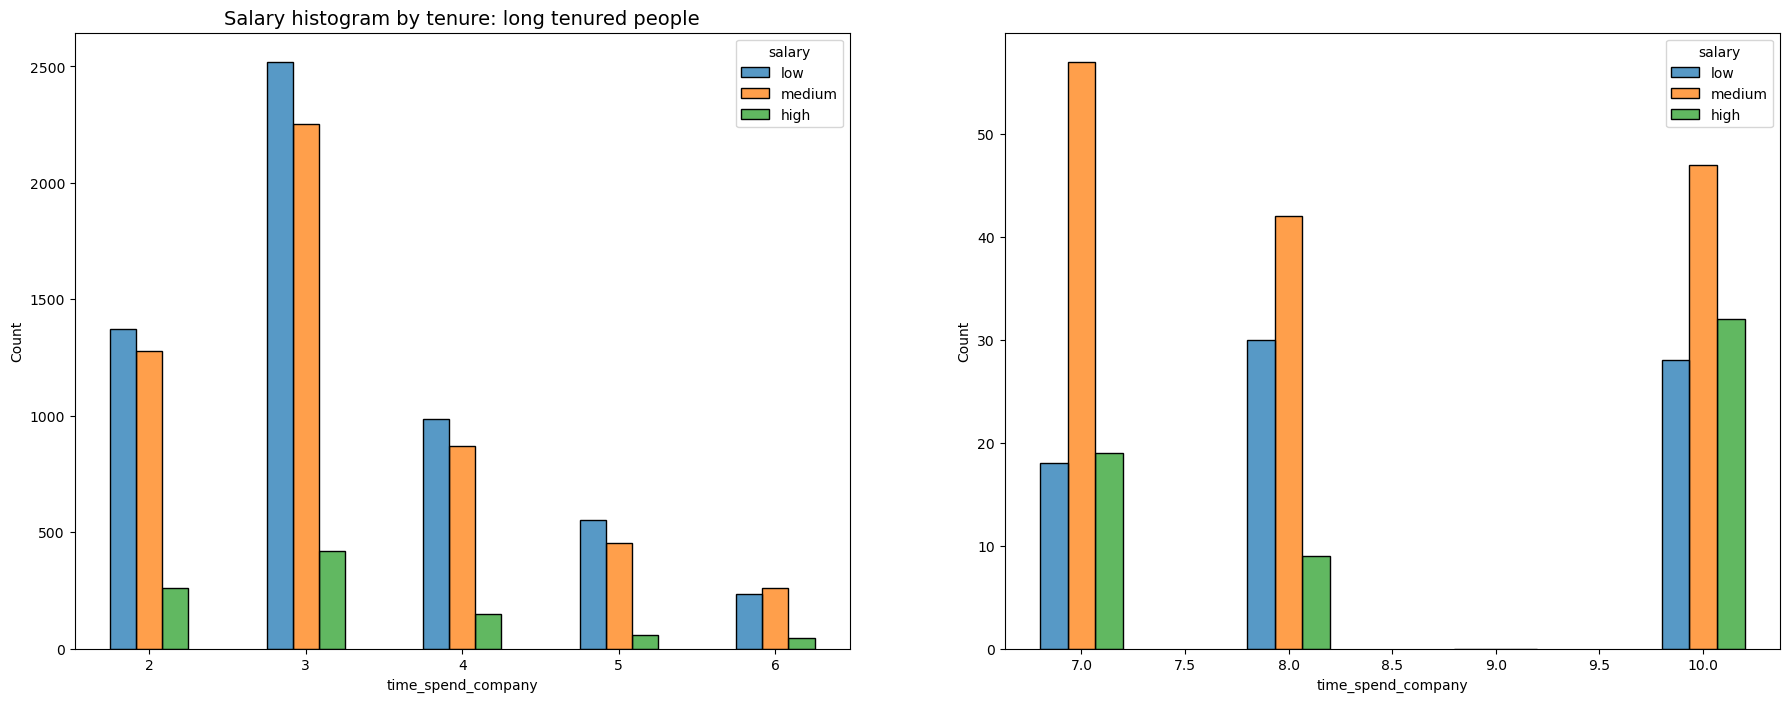

In [129]:
# Plot tenure vs level of salary
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# define short tenured employees  
tenure_short = df1[df1['time_spend_company']<7]

# define long tenured employees  
tenure_long = df1[df1['time_spend_company']>6]

# plot short tenured employees hist
sns.histplot(data=tenure_short, x='time_spend_company', hue='salary', discrete=1,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short tenured people', fontsize='14')

# plot long tenured employees hist
sns.histplot(data=tenure_long, x='time_spend_company', hue='salary', discrete=1,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[0].set_title('Salary histogram by tenure: long tenured people', fontsize='14')

Text(0.5, 1.0, 'monthly hours by last evaluations score')

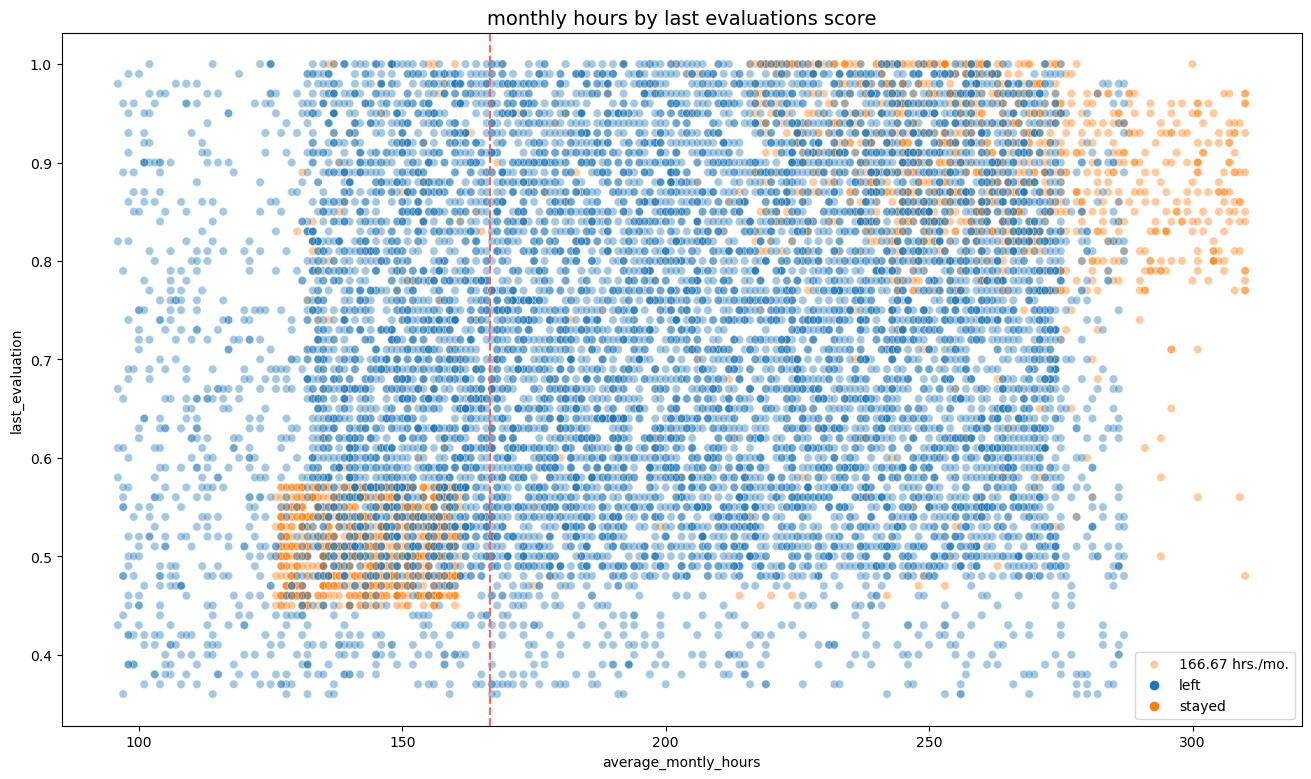

In [130]:
# Create scatterplot of average monthly hours vs last evaluation
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_montly_hours', y='last_evaluation', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('monthly hours by last evaluations score', fontsize='14')

Text(0.5, 1.0, 'monthly hours by promotion in the last 5 years')

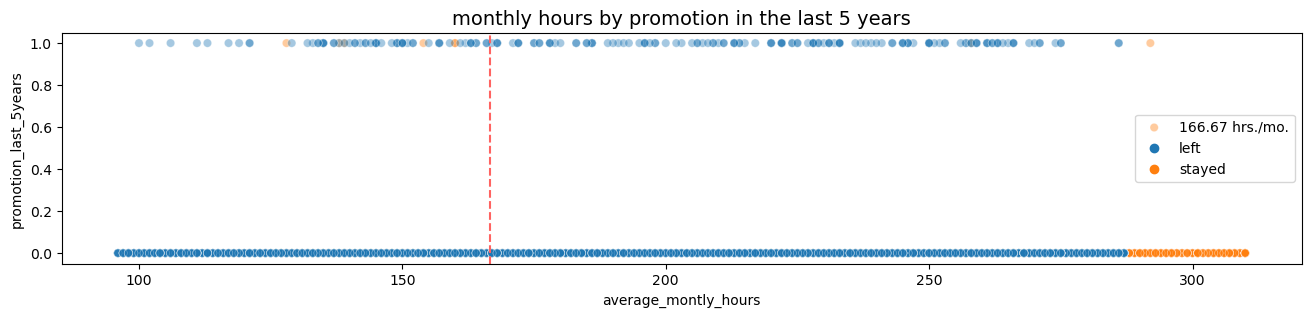

In [131]:
# examine whether employees who worked very long hours were promoted in the last five years
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1, x='average_montly_hours', y='promotion_last_5years', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('monthly hours by promotion in the last 5 years', fontsize='14')

In [132]:
# Display counts for each department
df1['department_name'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department_name, dtype: int64

Text(0.5, 1.0, 'Counts of stayed/left by Department')

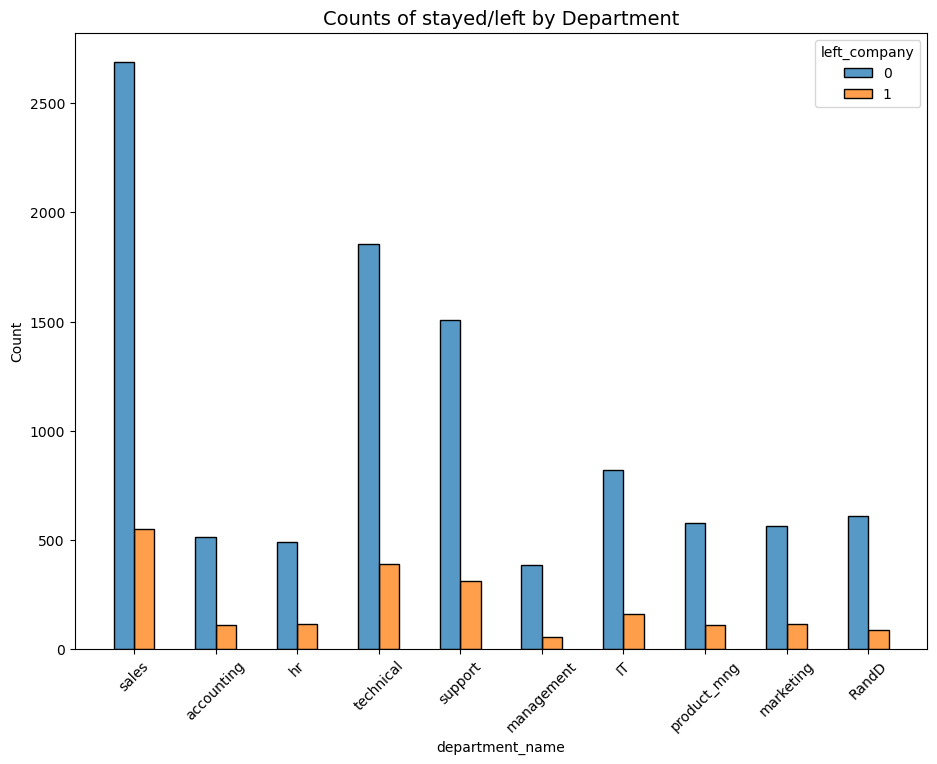

In [133]:
# Plot stacked hist. to compare department distribution of employees who left vs stayed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department_name', hue='left_company', discrete=1, 
             hue_order=[0,1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by Department', fontsize=14)

C:\Users\det-lab\AppData\Local\Temp\ipykernel_1616\4066160799.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df0.corr(), vmin=-1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


Text(0.5, 1.0, 'Correlation Heatmap')

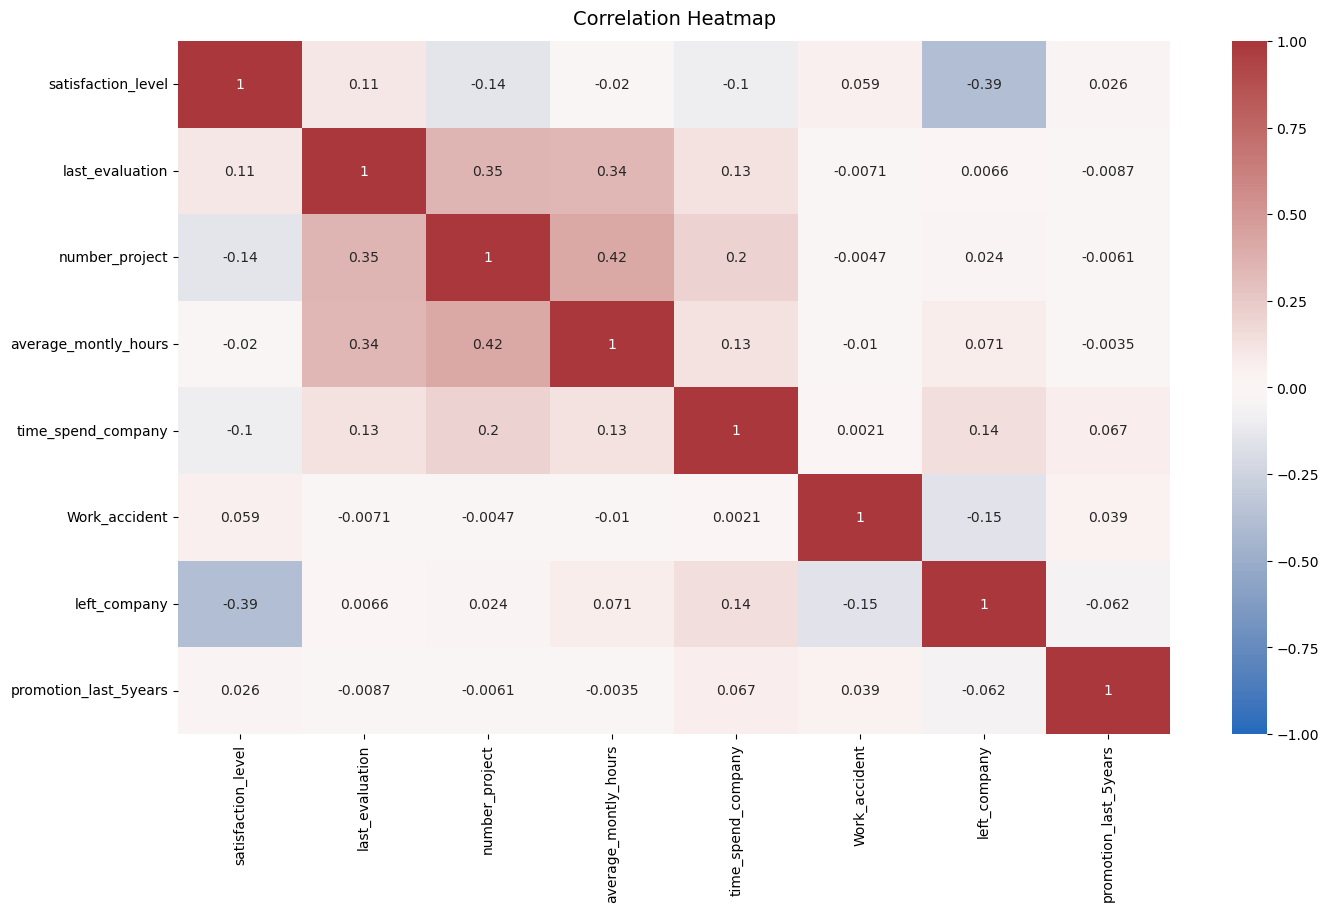

In [134]:
# Correlation heatmap of variables
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12) 

## Step 3. Model Building, Step 4. Results and Evaluation

In [135]:
# Copy dataframe
df_enc = df1.copy()

# Encoding the salary column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the department column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new datatframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left_company  promotion_last_5years  \
0                   3              0             1                      0   
1                   6              0             1                      0   
2                   4              0             1                      0   
3                   5              0             1                      0   
4                   3              0             1                      0   

   salary  department_name_IT  department_name_RandD  \
0       0                   0                      0   
1       1                   0                      0   
2       1                   0                      0   
3       0                   0                      0   
4       0                   0                      0   

   department_name_accounting  department_name_hr  department_name_management  \
0                           0                   0                           0   
1                           0                   0                           0   
2                           0                   0                           0   
3                           0                   0                           0   
4                           0                   0                           0   

   department_name_marketing  department_name_product_mng  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   department_name_sales  department_name_support  department_name_technical  
0                      1                        0                          0  
1                      1                        0                          0  
2                      1                        0                          0  
3                      1                        0                          0  
4                      1                        0                          0

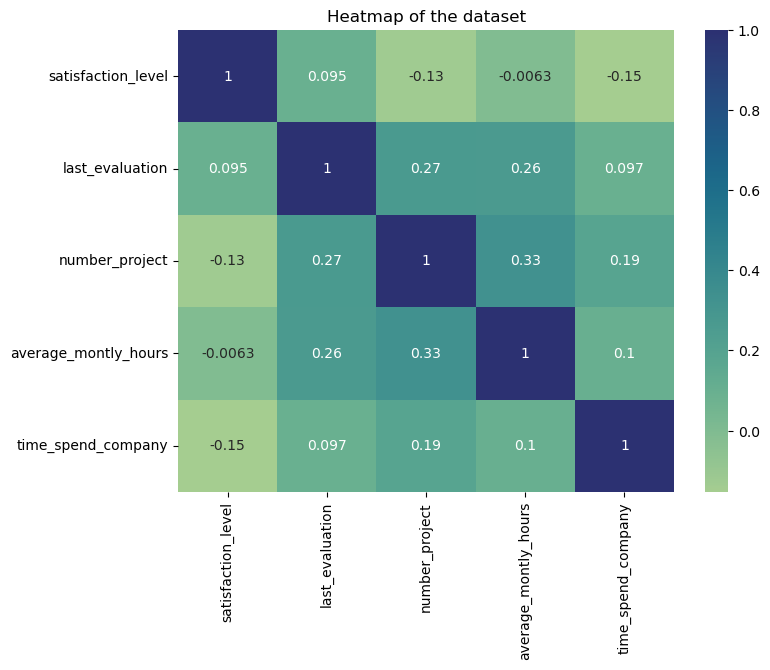

In [136]:
# create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
           .corr(), annot=True, cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

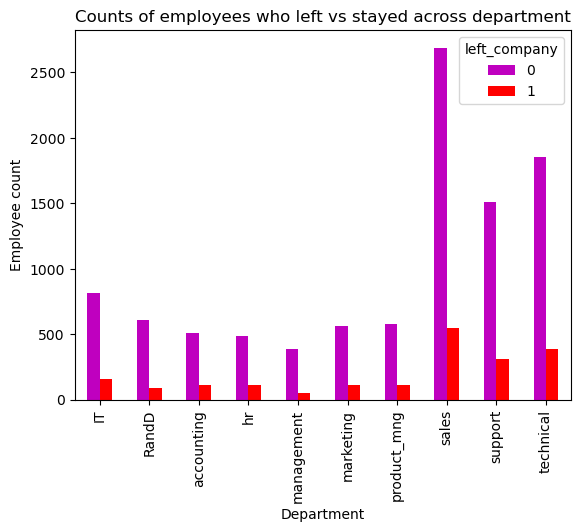

In [137]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.
pd.crosstab(df1['department_name'], df1['left_company']).plot(kind='bar', color='mr')
plt.title('Counts of employees who left vs stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [138]:
# Select rows without outliers in 'time_spend_company' and save resultin in dataframe in a new variable
df_logreg = df_enc[(df_enc['time_spend_company'] >= lower_lim) & (df_enc['time_spend_company'] <= upper_lim)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   

   time_spend_company  Work_accident  left_company  promotion_last_5years  \
0                   3              0             1                      0   
2                   4              0             1                      0   
3                   5              0             1                      0   
4                   3              0             1                      0   
5                   3              0             1                      0   

   salary  department_name_IT  department_name_RandD  \
0       0                   0                      0   
2       1                   0                      0   
3       0                   0                      0   
4       0                   0                      0   
5       0                   0                      0   

   department_name_accounting  department_name_hr  department_name_management  \
0                           0                   0                           0   
2                           0                   0                           0   
3                           0                   0                           0   
4                           0                   0                           0   
5                           0                   0                           0   

   department_name_marketing  department_name_product_mng  \
0                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   
5                          0                            0   

   department_name_sales  department_name_support  department_name_technical  
0                      1                        0                          0  
2                      1                        0                          0  
3                      1                        0                          0  
4                      1                        0                          0  
5                      1                        0                          0

In [139]:
# Isolate the outcome variable, which is the variable you want your model to predict.
y = df_logreg['left_company']

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left_company, dtype: int64

In [140]:
# Select the features you want to use in your model
x = df_logreg.drop('left_company', axis=1)

x.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   
2                   4              0                      0       1   
3                   5              0                      0       0   
4                   3              0                      0       0   
5                   3              0                      0       0   

   department_name_IT  department_name_RandD  department_name_accounting  \
0                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   
5                   0                      0                           0   

   department_name_hr  department_name_management  department_name_marketing  \
0                   0                           0                          0   
2                   0                           0                          0   
3                   0                           0                          0   
4                   0                           0                          0   
5                   0                           0                          0   

   department_name_product_mng  department_name_sales  \
0                            0                      1   
2                            0                      1   
3                            0                      1   
4                            0                      1   
5                            0                      1   

   department_name_support  department_name_technical  
0                        0                          0  
2                        0                          0  
3                        0                          0  
4                        0                          0  
5                        0                          0

In [141]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [142]:
# Construct a logistic regression model and fit it to the training dataset.
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)

In [143]:
# Test the logistic regression model: use the model to make predictions on the test set.
y_pred = log_clf.predict(x_test)

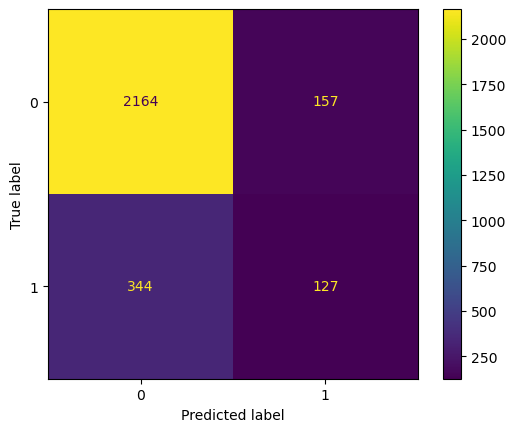

In [144]:
# Create a confusion matrix to visualize the results of the logistic regression model. 
# Compute values forconfusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

plt.show()

In [145]:
# Check the class balance in the data.
df_logreg['left_company'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left_company, dtype: float64

In [146]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.34       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



In [147]:
# Creating tree-based Model
# Isolate the outcome variable.
y = df_enc['left_company']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left_company, dtype: int64

In [148]:
# Select features
x = df_enc.drop('left_company', axis=1)

x.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   
1                   6              0                      0       1   
2                   4              0                      0       1   
3                   5              0                      0       0   
4                   3              0                      0       0   

   department_name_IT  department_name_RandD  department_name_accounting  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   department_name_hr  department_name_management  department_name_marketing  \
0                   0                           0                          0   
1                   0                           0                          0   
2                   0                           0                          0   
3                   0                           0                          0   
4                   0                           0                          0   

   department_name_product_mng  department_name_sales  \
0                            0                      1   
1                            0                      1   
2                            0                      1   
3                            0                      1   
4                            0                      1   

   department_name_support  department_name_technical  
0                        0                          0  
1                        0                          0  
2                        0                          0  
3                        0                          0  
4                        0                          0

In [149]:
# Split into test and training 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [150]:
# Construction of a decision tree
# Instantiation of model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }

# Assign a dict of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc' }

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [151]:
%%time
tree1.fit(x_train, y_train)

CPU times: total: 3.75 s
Wall time: 3.81 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

In [152]:
# check best score
tree1.best_score_

0.969819392792457

In [153]:
# check best params
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [154]:
# function that helps extract all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract Accuracy, presision, recall and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create a table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                         'precision': [precision],
                         'recall': [recall],
                         'F1': [f1],
                         'accuracy': [accuracy],
                         'auc': [auc]
                         })
    return table

In [155]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

In [156]:
# Create random forest to avoid over fitting 

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5,None],
             'max_features':[1.0],
            'max_samples': [0.7,1.0],
            'min_samples_leaf': [1,2,3],
            'min_samples_split': [2,3,4],
            'n_estimators': [300,500]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [157]:
# Fill random forest with the training data

In [158]:
%%time
rf1.fit(x_train, y_train)

CPU times: total: 22min 53s
Wall time: 23min 1s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

In [159]:
# Define a path to the folder I want to save the model
path = "C:/Users/det-lab/Documents/Google data analytics notes"

In [160]:
# Define functions to pickle the model and read in the model.


In [161]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [162]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [163]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [164]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [165]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [166]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [167]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


In [168]:
# Define a function that gets all the scores from a model's predictions.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [169]:
# use the best performing model to predict on the test set.
rf1_test_scores = get_scores('Random forest test', rf1, x_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  Random forest test   0.964211  0.919679  0.941418  0.980987  0.956439

In [170]:
# Preping data for feature eng.

# Drop satisfaction_level and save resulting dataframe to a new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

last_evaluation  number_project  average_montly_hours  time_spend_company  \
0             0.53               2                   157                   3   
1             0.86               5                   262                   6   
2             0.88               7                   272                   4   
3             0.87               5                   223                   5   
4             0.52               2                   159                   3   

   Work_accident  left_company  promotion_last_5years  salary  \
0              0             1                      0       0   
1              0             1                      0       1   
2              0             1                      0       1   
3              0             1                      0       0   
4              0             1                      0       0   

   department_name_IT  department_name_RandD  department_name_accounting  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   department_name_hr  department_name_management  department_name_marketing  \
0                   0                           0                          0   
1                   0                           0                          0   
2                   0                           0                          0   
3                   0                           0                          0   
4                   0                           0                          0   

   department_name_product_mng  department_name_sales  \
0                            0                      1   
1                            0                      1   
2                            0                      1   
3                            0                      1   
4                            0                      1   

   department_name_support  department_name_technical  
0                        0                          0  
1                        0                          0  
2                        0                          0  
3                        0                          0  
4                        0                          0

In [171]:
# Create overworked col.
df2['overworked'] = df2['average_montly_hours']

print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [172]:
# Define overworked as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [173]:
# Drop the monthly hours column
df2 = df2.drop('average_montly_hours', axis=1)

df2.head()

last_evaluation  number_project  time_spend_company  Work_accident  \
0             0.53               2                   3              0   
1             0.86               5                   6              0   
2             0.88               7                   4              0   
3             0.87               5                   5              0   
4             0.52               2                   3              0   

   left_company  promotion_last_5years  salary  department_name_IT  \
0             1                      0       0                   0   
1             1                      0       1                   0   
2             1                      0       1                   0   
3             1                      0       0                   0   
4             1                      0       0                   0   

   department_name_RandD  department_name_accounting  department_name_hr  \
0                      0                           0                   0   
1                      0                           0                   0   
2                      0                           0                   0   
3                      0                           0                   0   
4                      0                           0                   0   

   department_name_management  department_name_marketing  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   department_name_product_mng  department_name_sales  \
0                            0                      1   
1                            0                      1   
2                            0                      1   
3                            0                      1   
4                            0                      1   

   department_name_support  department_name_technical  overworked  
0                        0                          0           0  
1                        0                          0           1  
2                        0                          0           1  
3                        0                          0           1  
4                        0                          0           0

In [190]:
# Isolate outcome varible
y = df2['left_company']

# select the features
x = df2.drop('left_company', axis=1)

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left_company, Length: 11991, dtype: int64

In [191]:
# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [192]:
# Decision tree round 2

#Instantiate tree
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy' , 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [193]:
%%time
tree2.fit(x_train, y_train)

CPU times: total: 3.16 s
Wall time: 3.18 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

In [194]:
# check best paprams
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [195]:
# Check auc score
tree2.best_score_

0.9586752505340426

In [196]:
# Get all cv scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


In [197]:
# random forest round 2

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [198]:
%%time
rf2.fit(x_train, y_train)

CPU times: total: 17min 1s
Wall time: 17min 6s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

In [199]:
# Write Pickle 
write_pickle(path, rf2, 'hr_rf2')

In [200]:
# Read pickle
rf2 = read_pickle(path, 'hr_rf2')

In [201]:
# chack params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [202]:
# check score
rf2.best_score_

0.9648100662833985

In [203]:
# Get all cv scores
rf2_cv_results = make_results('random forest cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
              model  precision    recall        F1  accuracy      auc
0  random forest cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [204]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, x_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

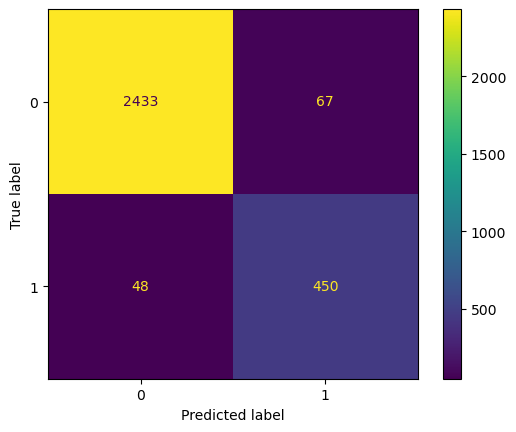

In [206]:
# Plot a confusion matrix to visualize how well it predicts on the test set.
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='');

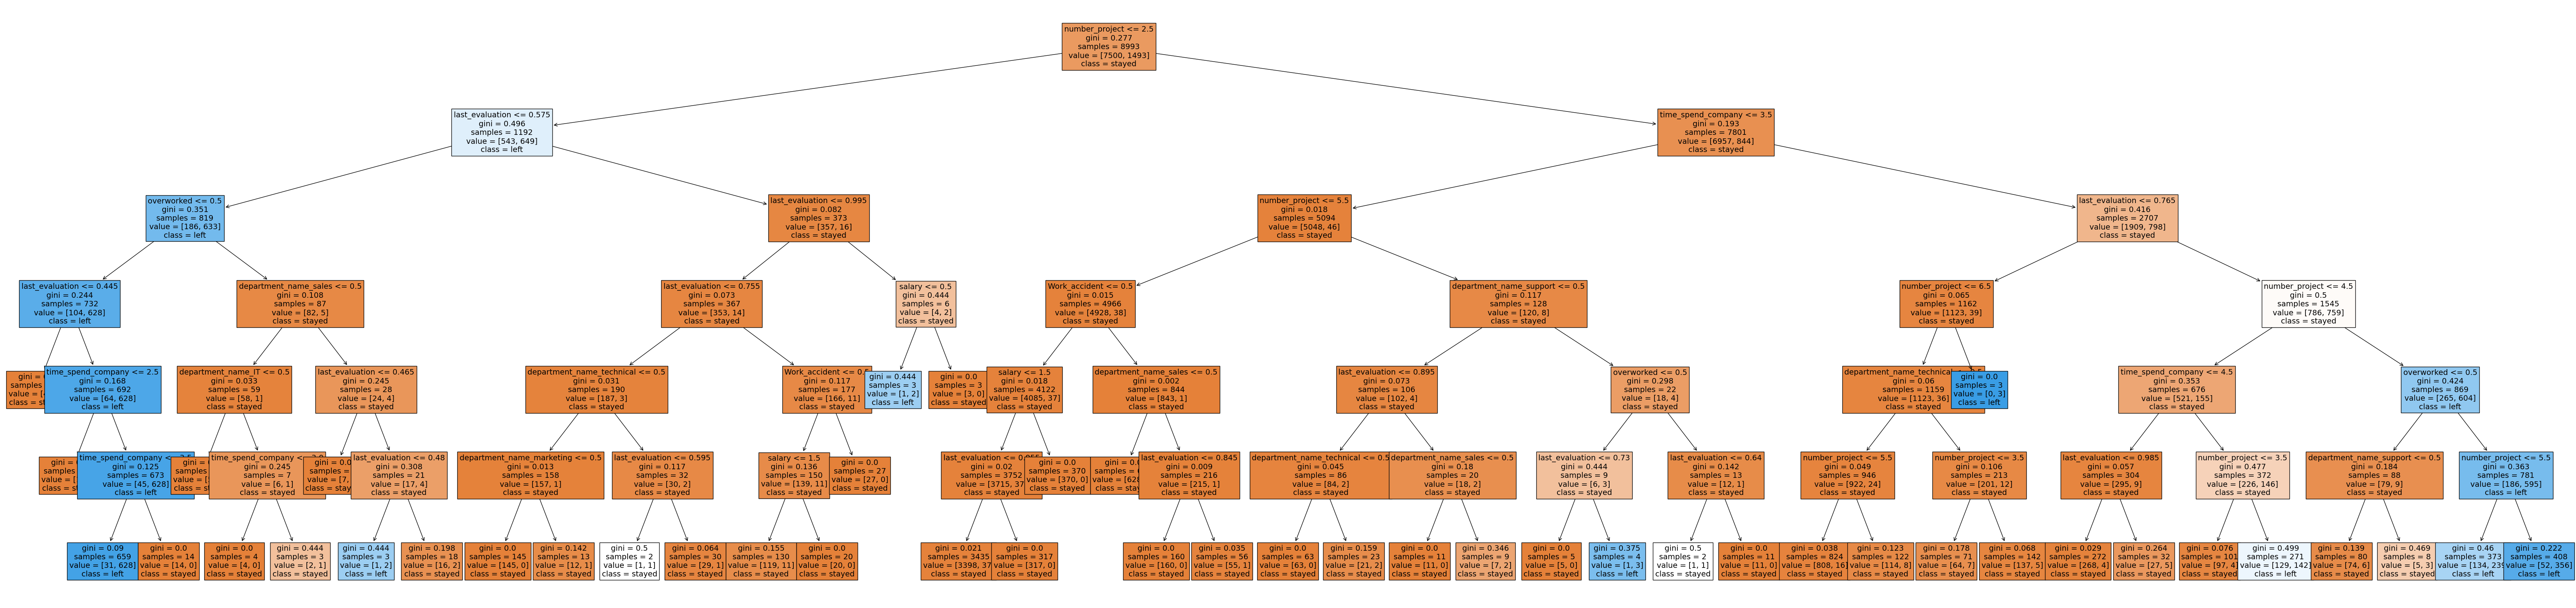

In [207]:
# Decision tree splits
# plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns,
          class_names={0: 'stayed', 1: 'left'}, filled=True)
plt.show()

In [213]:
# Get feature importance
tree2_importance = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                columns=['gini_importance'],
                                index=x.columns
                               )
tree2_importance= tree2_importance.sort_values(by='gini_importance', ascending=False)

# Only extract the features with the importances
tree2_importance = tree2_importance[tree2_importance['gini_importance'] != 0]
tree2_importance

gini_importance
last_evaluation                   0.343958
number_project                    0.343385
time_spend_company                0.215681
overworked                        0.093498
department_name_support           0.001142
salary                            0.000910
department_name_sales             0.000607
department_name_technical         0.000418
Work_accident                     0.000183
department_name_IT                0.000139
department_name_marketing         0.000078

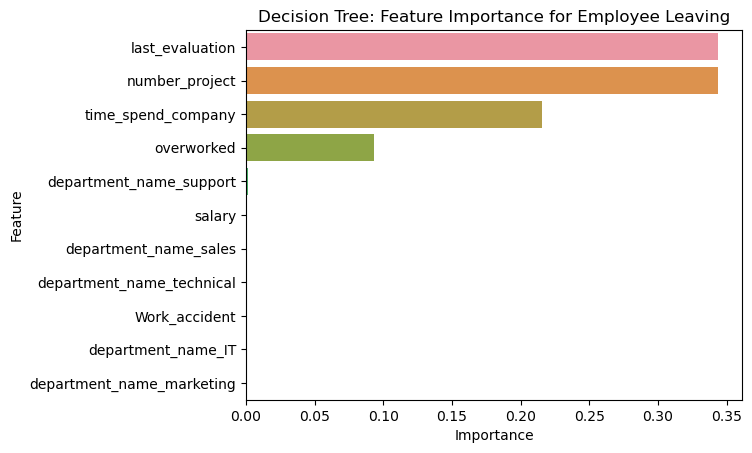

<Figure size 640x480 with 0 Axes>

In [219]:
# create a barplot to visualize the decision tree feature importances.
sns.barplot(data=tree2_importance, x='gini_importance', y=tree2_importance.index, orient='h')
plt.title("Decision Tree: Feature Importance for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel('Importance')
plt.show()
plt.savefig("my_hr_dtreeFE.png")

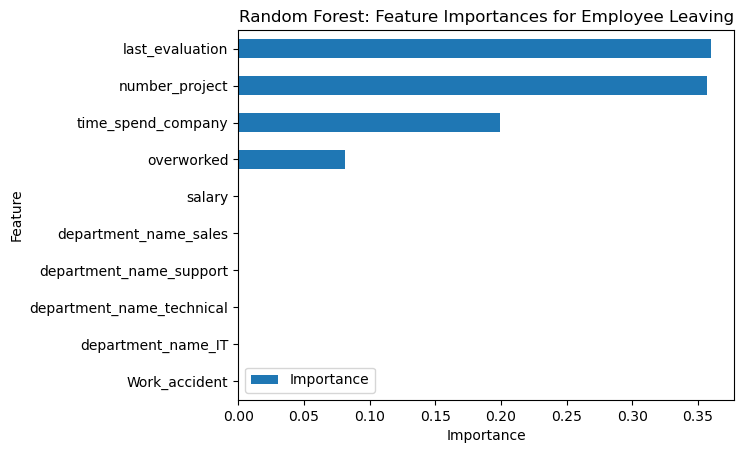

<Figure size 640x480 with 0 Axes>

In [220]:
# Plotting feature importance for the random forest model
# Get feature importance 
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = x.columns[ind]

# filter feat_impt to consist of top 10 feature importance
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()
plt.savefig("my_hr_RF_FI.png")

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders


